# Supervised CARE Training

Here we use CARE training using noisy images as input and averaged noisy images as target.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet
from ppn2v import utils, training

from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Ensure ```filename = example2_digital_offset300.tif``` and specify the ```dataname```  

In [3]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the care model

#### Noisy Data (Input to network)

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_care'

#### Ground truth Data (Target of Network)

In [5]:
dataGT = np.mean(data, axis=0)[np.newaxis,...,np.newaxis]

In [6]:
data=data[...,np.newaxis]
dataGT = np.repeat(dataGT, 200, axis=0)
print("Shape of Raw Noisy Image is ", data.shape, "; Shape of Target Image is ", dataGT.shape)
data = np.concatenate((data,dataGT),axis=-1)
# Add the target image as a second channel to `data`
print("Shape of `data` is ", data.shape)

Shape of Raw Noisy Image is  (200, 512, 512, 1) ; Shape of Target Image is  (200, 512, 512, 1)
Shape of `data` is  (200, 512, 512, 2)


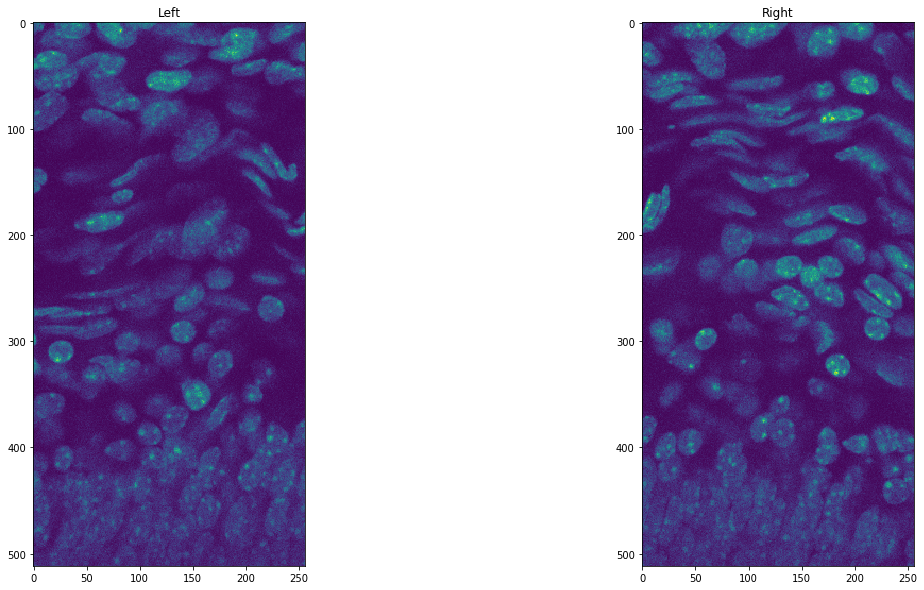

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(data[0,:,:256,0])
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(data[0,:,256:,0])
plt.title('Right')

plt.show()

# We now crop away the left portion of the data since this portion will be used later for testing
data = data[:, :, 256:, :]

### Create the Network and Train it
This can take a while.

In [8]:
# The CARE network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3, supervised=True)

/home/starke88/.conda/envs/ppn2v-dendrites/lib/python3.7/site-packages/PPN2V-0.1-py3.7.egg/ppn2v/unet/model.py:214: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/starke88/.conda/envs/ppn2v-dendrites/lib/python3.7/site-packages/PPN2V-0.1-py3.7.egg/ppn2v/unet/model.py:215: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 0.2695308290421963+-(2SEM)0.020937254192981716      
Epoch 1 finished      
avg. loss: 0.06181402243673802+-(2SEM)0.0080805924843548      
Epoch 2 finished      
avg. loss: 0.06977263260632753+-(2SEM)0.008919107897331349      
Epoch 3 finished      
avg. loss: 0.06520375180989504+-(2SEM)0.006159146234041987      
Epoch 4 finished      
avg. loss: 0.04289930313825607+-(2SEM)0.006045359340561894      
Epoch 5 finished      
avg. loss: 0.027750563528388738+-(2SEM)0.002658075179464732      
Epoch 6 finished      
avg. loss: 0.03175027268007398+-(2SEM)0.005174622858269402      
Epoch 7 finished      
avg. loss: 0.0305109828710556+-(2SEM)0.0031237707695018755      
Epoch 8 finished      
avg. loss: 0.02640530513599515+-(2SEM)0.0030814598909154043      
Epoch 9 finished      
avg. loss: 0.025548597052693366+-(2SEM)0.0035942790450612582      
Epoch 10 finished      
avg. loss: 0.026357270870357753+-(2SEM)0.002928970128162224      
Epoch 11 finished      
avg. 

Epoch 90 finished      
avg. loss: 0.014894671551883221+-(2SEM)0.0021127972926237915      
Epoch 91 finished      
avg. loss: 0.013454256439581513+-(2SEM)0.0019514771303323966      
Epoch 92 finished      
avg. loss: 0.014175210334360599+-(2SEM)0.0019506907581323379      
Epoch 93 finished      
avg. loss: 0.014643392805010081+-(2SEM)0.0017343689868985824      
Epoch 94 finished      
avg. loss: 0.016194671811535954+-(2SEM)0.002178849649129432      
Epoch    95: reducing learning rate of group 0 to 1.2500e-04.
Epoch 95 finished      
avg. loss: 0.01744758998975158+-(2SEM)0.0026061464462243528      
Epoch 96 finished      
avg. loss: 0.015042337495833636+-(2SEM)0.0020492044630053717      
Epoch 97 finished      
avg. loss: 0.014046291192062198+-(2SEM)0.0019239488207819422      
Epoch 98 finished      
avg. loss: 0.013281351490877568+-(2SEM)0.0020535226533147737      
Epoch 99 finished      
avg. loss: 0.014254138432443142+-(2SEM)0.001960231244798629      
Epoch 100 finished      
avg. l

avg. loss: 0.015315920813009143+-(2SEM)0.00255321481048447      
Epoch 176 finished      
avg. loss: 0.01580698979087174+-(2SEM)0.0016260549159165317      
Epoch 177 finished      
avg. loss: 0.01453766638878733+-(2SEM)0.0019394947036174741      
Epoch 178 finished      
avg. loss: 0.017298841616138816+-(2SEM)0.0025442558218241582      
Epoch 179 finished      
avg. loss: 0.017545601772144436+-(2SEM)0.0019408301385291985      
Epoch 180 finished      
avg. loss: 0.015400579385459422+-(2SEM)0.0023147026874270325      
Epoch 181 finished      
avg. loss: 0.015182712255045772+-(2SEM)0.00206800949996989      
Epoch 182 finished      
avg. loss: 0.016368497209623457+-(2SEM)0.0021258932366606414      
Epoch 183 finished      
avg. loss: 0.016246485617011787+-(2SEM)0.001903352925576026      
Epoch 184 finished      
avg. loss: 0.014211106463335454+-(2SEM)0.001901597591058193      
Epoch 185 finished      
avg. loss: 0.015442103333771228+-(2SEM)0.002180138479928585      
Epoch   186: reducing 

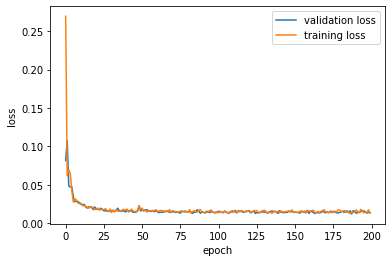

In [9]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()